In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
citydata= pd.read_csv("city_data.csv")
ridedata= pd.read_csv("ride_data.csv")


In [4]:
#Average Fare Per City

In [5]:
citydata.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [6]:
#Total Number of Rides Per City

In [7]:
ridedata.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [8]:
ridedata.shape

(2375, 4)

In [9]:
len(ridedata.city.unique())

125

In [10]:
average_fare_per_city=ridedata.groupby(["city"]).mean().reset_index()
average_fare_per_city["average_fare"]= average_fare_per_city["fare"]
average_fare_per_city.drop(["fare", "ride_id"],axis=1, inplace=True)

In [11]:
average_fare_per_city.head()

,city,average_fare
0,Alvarezhaven,23.928710
1,Alyssaberg,20.609615
2,Anitamouth,37.315556
3,Antoniomouth,23.625000
4,Aprilchester,21.981579


In [12]:
total_num_of_rides_per_city = ridedata.groupby(['city']).count().reset_index()
total_num_of_rides_per_city['total_rides'] = total_num_of_rides_per_city['fare']
total_num_of_rides_per_city.drop(['fare', 'ride_id', "date"], axis=1, inplace=True)

In [13]:
total_num_of_rides_per_city.head()

,city,total_rides
0,Alvarezhaven,31
1,Alyssaberg,26
2,Anitamouth,9
3,Antoniomouth,22
4,Aprilchester,19


In [14]:
#Total Number of Drivers Per City

In [15]:
citydata[citydata.duplicated()]

,city,driver_count,type


In [16]:
city_data_grouped = citydata.groupby(['city', 'type']).sum().reset_index()
city_data_grouped['driver_count'] = city_data_grouped['driver_count']
city_data_grouped.head()

,city,type,driver_count
0,Alvarezhaven,Urban,21
1,Alyssaberg,Urban,67
2,Anitamouth,Suburban,16
3,Antoniomouth,Urban,21
4,Aprilchester,Urban,49


In [17]:
df = pd.merge(city_data_grouped, average_fare_per_city, how='left', on=['city'])

In [18]:
df = pd.merge(df,total_num_of_rides_per_city,how="left", on = ["city"])

In [19]:
df.head()

,city,type,driver_count,average_fare,total_rides
0,Alvarezhaven,Urban,21,23.928710,31
1,Alyssaberg,Urban,67,20.609615,26
2,Anitamouth,Suburban,16,37.315556,9
3,Antoniomouth,Urban,21,23.625000,22
4,Aprilchester,Urban,49,21.981579,19


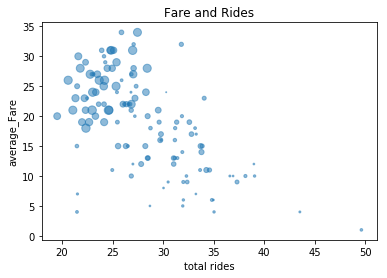

In [20]:
plt.scatter(df.average_fare, df.total_rides, s=df.driver_count, alpha=0.5)
plt.xlabel("total rides")
plt.ylabel("average_Fare")
plt.title ("Fare and Rides")
plt.show()


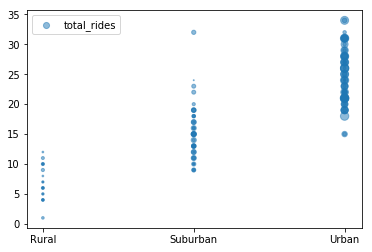

In [21]:
plt.scatter(df["type"], df.total_rides, s=df.driver_count, alpha=0.5)
plt.legend()
plt.show()

In [22]:
# % of Total Fares by City Type
# sum of toal fares per city / total_fare of all cities
total_fares_across_all_cities =  df['total_fare'].sum()
total_fares_by_city_type = df.groupby('type').sum()['total_fare'] / total_fares_across_all_cities
total_fares_by_city_type.head()


KeyError: 'total_fare'

In [ ]:
labels = total_fares_by_city_type.index.tolist()
values = total_fares_by_city_type.values.tolist()
colors = ['gold', 'lightcoral', 'lightskyblue']
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('% of Total Fares by City Type')
;


In [ ]:
# Create total rides by city
ride_per_city = ridedata.groupby(['city']).sum().reset_index()
ride_per_city['ride_id'] = ride_per_city['ride_id']
ride_per_city.drop(['ride_id', 'ride_id'], axis=1, inplace=True)
df = pd.merge(df, ride_per_city, how='left', on=['city'])

In [ ]:
df.head()

In [ ]:
# % of Total rides by City Type
total_num_of_rides_per_city =  df['total_rides'].sum()
total_num_of_rides_per_city = df.groupby('type').sum()['total_rides'] / total_num_of_rides_per_city
total_num_of_rides_per_city.head()

In [ ]:
labels = total_num_of_rides_per_city.index.tolist()
values = total_num_of_rides_per_city.values.tolist()
colors = ['gold', 'lightcoral', 'lightskyblue']
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('% of Total Rides by City Type')
;

In [ ]:
# Create total rides by city
driver_per_city = citydata.groupby(['city']).sum().reset_index()
driver_per_city['driver_count'] = driver_per_city['driver_count']
driver_per_city.drop(['driver_count', 'driver_count'], axis=1, inplace=True)
df = pd.merge(df, driver_per_city, how='left', on=['city'])
df.head ()


In [ ]:
total_drivers_across_all_cities =  df['driver_count'].count()
total_drivers_across_all_type = df.groupby('type').sum()['driver_count'] / total_drivers_across_all_cities
total_drivers_across_all_type.head()

In [ ]:
labels = total_drivers_across_all_type.index.tolist()
values = total_drivers_across_all_type.values.tolist()
colors = ['gold', 'lightcoral', 'lightskyblue']
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('% of Total Drivers by City Type')
;
